## Pierwszy model sieci - problem klasyfikacji
Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystałem dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi.

Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).


### 1 Import bibliotek

In [162]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

#czytelniejsze wyświetlanie próbek obrazów 28x28
np.set_printoptions(linewidth=120)

### 2 Załadowanie i przygotowanie danych

In [163]:
(X_train, Y_train), (X_test, Y_test) = load_data()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)
print("Pierwsza próbka:")
print(X_train[0])
print("Rozmiar próbki: ", X_train[0].shape)

# standaryzacja danych - teraz wartości pikseli bedą z przedziału od 0 do 1, a nie od 0 do 255
X_train = X_train / 255
X_test = X_test / 255

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)
Pierwsza próbka:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 

### 3 Eksploracja danych

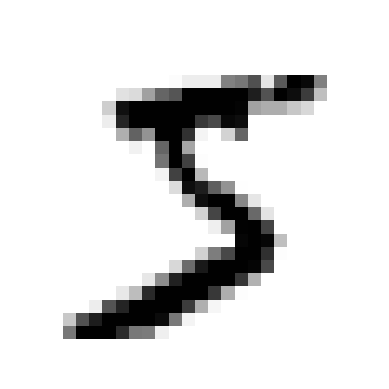

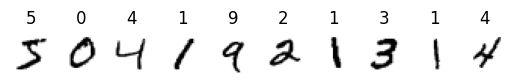

In [164]:
plt.imshow(X_train[0], cmap = 'gray_r')
plt.axis('off')

plt.figure()
for i in range(0, 10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(Y_train[i])

### 4 Budowa sieci neuronowej

In [165]:
model = Sequential()

# dodajemy 4 warstwy
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 5 Trenowanie modelu

In [166]:
history = model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9144
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1420 - accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1060 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0881 - accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0742 - accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0635 - accuracy: 0.9799
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9829
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9841
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.042

### 6 Ocena modelu

In [167]:
model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - loss: 0.0651 - accuracy: 0.9795 - 729ms/epoch - 2ms/step


[0.06511255353689194, 0.9794999957084656]

In [168]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.294148,0.914400
1,0.142017,0.957467
2,0.106006,0.967850
3,0.088122,0.973033
4,0.074171,0.977733
5,0.063526,0.979917
6,0.058709,0.981133
7,0.051763,0.982900
8,0.047917,0.984083
9,0.042234,0.985933


Text(0.5, 1.0, 'accuracy')

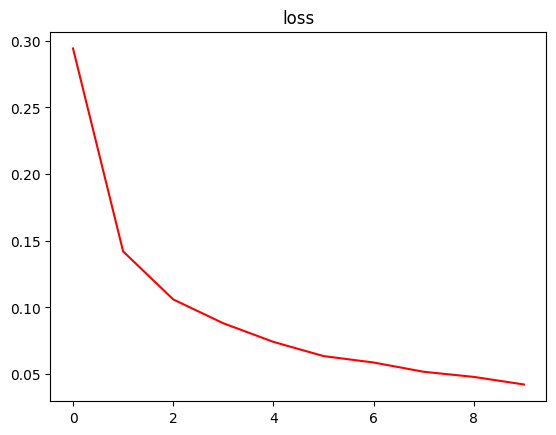

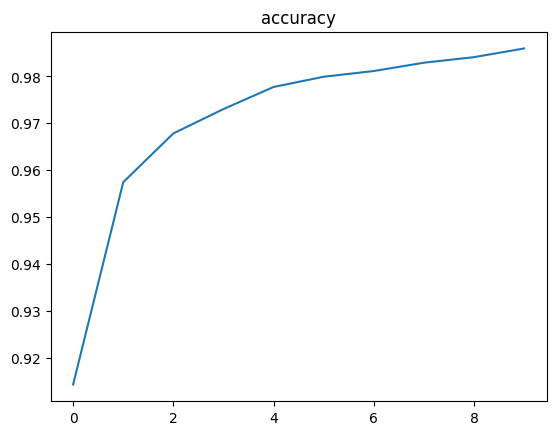

In [169]:
plt.figure('loss')
plt.plot(metrics['loss'], 'r')
plt.title('loss')
plt.figure('accuracy')
plt.plot(metrics['accuracy'])
plt.title('accuracy')

### 7 Predykcja na podstawie modelu

In [170]:
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [171]:
comparison_table = pd.concat([pd.DataFrame(Y_test, columns=['Y_test']), 
                              pd.DataFrame(Y_pred, columns=['Y_pred'])], axis=1)
comparison_table.head(10)

,Y_test,Y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [172]:
misclassified = comparison_table[comparison_table['Y_test'] != comparison_table['Y_pred']]
misclassified.index[:10]

Int64Index([149, 247, 259, 321, 340, 381, 445, 448, 495, 582], dtype='int64')

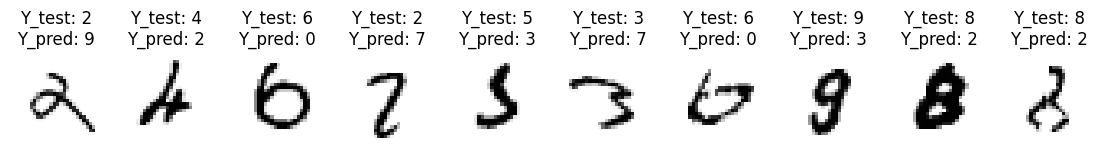

In [173]:
plt.figure(figsize=(14, 4))
for i, j in zip(range(0, 10), misclassified.index[:10]):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('Y_test: ' + str(Y_test[j]) + '\n' + 'Y_pred: ' + str(Y_pred[j]), color='black', fontsize=12)